# Starbucks Capstone Challenge

## Project Overview 
This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.
Here we have 3 simulated datasets from starbucks about offers to users, users info and events like transcations and giving out offers. 

## Our Aim
#### 1-try to predict using a machine learning given a user's info and offer's info if that user is likely to use the offer and that could help figuring out which users should starbucks target
#### 2-find the most correlated features that affects offers getting completed from both the user side and the offer side
#### 3-to predict the total amount a person could spend on starbucks products given that person demographics


### Exploration
First thing I will do here is simply check all 3 data sets see if we can find anything intersting and figure out there structure, possible outliers and try to do a few visulaizations to see the distbution of age for the users and income of the users, and percentage of males to females 
### Cleaning
Second thing I will clean the data so that it can be input to the ML learning model to predict if a user would respond to an offer or not and to predict the total amount a user would spend at starbucks
### Implementation
I will check the correlation from the cleaned dataframe and in order to predict if a user will respond to an offer or not I will build the a K nearest neighbour model and use gridsearch to optimize the hyperparameters.
I will build a KNN regression model to predict the total amount users would spend at starbucks as well and use gridsearch to optimize the hyperparameters
### Conclusion and future optimiztions
This section covers the results of the model and what I sugget to improve the results
## Metrics 
I will use to evalute the preformance of the offer success model 3 metrics the F1-score, precision, and recall

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

I will use to evalute the preformance of the total amount spent by users model using R-Sqaured or the coefficient of determination which is  a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). 

R_squared=1−(sum squared regression (SSR)/total sum of squares (SST))

SST, is the squared differences between the observed dependent variable and its mean

SSR, is the sum of the differences between the predicted value and the mean of the dependent variable. Think of it as a measure that describes how well our line fits the data.



# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



## Exploring  the 3 dataframes

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
portfolio.shape

(10, 6)

In [4]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [5]:
profile.head()


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [6]:
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [7]:
mean=profile['age'].mean()
std=profile['age'].std()
print("The mean for the age of the customers is {} and the stddev is {}".format(mean,std))

The mean for the age of the customers is 62.53141176470588 and the stddev is 26.738579945767242


In [8]:
mean_1=profile['income'].mean()
std_1=profile['income'].std()
print("The income for the age of the customers is {} and the stddev is {}".format(mean_1,std_1))

The income for the age of the customers is 65404.9915682968 and the stddev is 21598.299410229498


In [9]:
 profile.isnull().sum() * 100 / len(profile)

age                  0.000000
became_member_on     0.000000
gender              12.794118
id                   0.000000
income              12.794118
dtype: float64

It seems that the exact percentage of users that didn't report gender didn't report income as well

### Data Visualization

Text(0,0.5,'Number of customers')

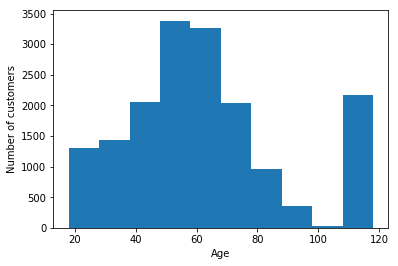

In [10]:
#Age Distribution
plt.hist(profile['age'])
plt.xlabel('Age')
plt.ylabel('Number of customers')

We can see an some outliers here probably with a fake age as there are too many near 120 years howver most of the users seem to be between 40 and 80 years old 

Text(0,0.5,'Number of customers')

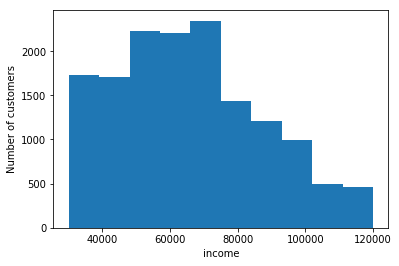

In [11]:
#Income distribution
profile_nonan=profile.dropna(axis=0)
plt.hist(profile_nonan['income'])
plt.xlabel('income')
plt.ylabel('Number of customers')

([<matplotlib.patches.Wedge at 0x7f3a0b07def0>,
 [Text(-1.07176,-0.247629,'Male'),
  Text(1.0818,0.199246,'Female'),
  Text(0.0494014,1.09889,'Other')],
 [Text(-0.584599,-0.13507,'57.2%'),
  Text(0.590075,0.10868,'41.3%'),
  Text(0.0269462,0.599395,'1.4%')])

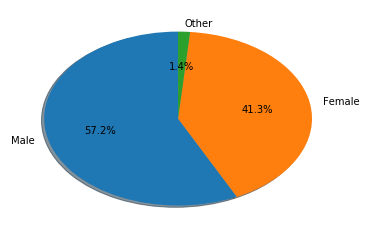

In [12]:
#Percentage of male ,female and others
labels=['Male','Female','Other']
sizes=[sum(profile_nonan['gender']=='M'),sum(profile_nonan['gender']=='F'),sum(profile_nonan['gender']=='O')]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [13]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


## Data Preprocessing

In [14]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [15]:
#changing channel and offer type into dummy variable
portfolio['email']=portfolio['channels'].astype(str).str.contains('email').astype(int)
portfolio['web']=portfolio['channels'].astype(str).str.contains('web').astype(int)
portfolio['mobile']=portfolio['channels'].astype(str).str.contains('mobile').astype(int)
portfolio['social']=portfolio['channels'].astype(str).str.contains('social').astype(int)
portfolio.drop(['channels'],axis=1,inplace=True)
portfolio = pd.concat([portfolio.drop('offer_type', axis=1), pd.get_dummies(portfolio['offer_type'])], axis=1)

In [16]:

portfolio.head()

,difficulty,duration,id,reward,email,web,mobile,social,bogo,discount,informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,1,1,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,1,0,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,1,0,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,1,0,0,0,1,0


In [17]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [18]:
#drop Nans dummy gender variable 
profile = pd.concat([profile.drop('gender', axis=1), pd.get_dummies(profile['gender'])], axis=1)


In [19]:
##profile['became_member_on'] = profile['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))


In [20]:
profile.head()

,age,became_member_on,id,income,F,M,O
0,118,20170212,68be06ca386d4c31939f3a4f0e3dd783,NaN,0,0,0
1,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,1,0,0
2,118,20180712,38fe809add3b4fcf9315a9694bb96ff5,NaN,0,0,0
3,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,0,0
4,118,20170804,a03223e636434f42ac4c3df47e8bac43,NaN,0,0,0


In [21]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [22]:
#Values for event 
np.unique(transcript.event.values)

array(['offer completed', 'offer received', 'offer viewed', 'transaction'], dtype=object)

In [23]:
transcript_offer=transcript[transcript['value'].astype(str).str.contains('offer')]
transcript_offer.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [24]:
#to get only the id and nothing else and removing the value column
transcript_offer['offer_id']=transcript_offer['value'].astype(str).str.slice(14,46)
transcript_offer.drop(['value'],inplace=True,axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
#get dummy vars for event and drop event
dummies=pd.get_dummies(transcript_offer['event'])
transcript_offer = pd.concat([transcript_offer,dummies], axis=1)
transcript_offer.drop(['event'],inplace=True,axis=1)
transcript_offer.head()

,person,time,offer_id,offer completed,offer received,offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0


In [26]:
df = transcript_offer[(~transcript_offer.duplicated(['person','offer_id']))]

To create a model to predict if a user responds to an offer we I want us to have each row represnts if a user recived offer,viewed it and completed it so we need to combine our dummy varaibles by person and offer_id

In [27]:
df['offer completed']=transcript_offer.groupby(['person','offer_id']).sum()['offer completed'].values
df['offer received']=transcript_offer.groupby(['person','offer_id']).sum()['offer received'].values
df['offer viewed']=transcript_offer.groupby(['person','offer_id']).sum()['offer viewed'].values
df.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

(63288, 6)

In [28]:
#creat Df for transactions
transcript_transcation=transcript[transcript['value'].astype(str).str.contains('amount')]

In [29]:
#to get only the amount and nothing else and removing the value column
transcript_transcation['amount']=transcript_transcation['value'].astype(str).str.slice(10,-1)

transcript_transcation.drop(['value'],inplace=True,axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
#check if amount is int
transcript_transcation.dtypes

event     object
person    object
time       int64
amount    object
dtype: object

In [31]:
#transform amount into int
transcript_transcation['amount']=pd.to_numeric(transcript_transcation['amount'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
#get total spent by each user 
total=dict(transcript_transcation.groupby(['person']).sum()['amount'])


In [33]:
#append that total to the profile Df to each user will 
profile['total'] = profile.id.map(total)
profile.head()

,age,became_member_on,id,income,F,M,O,total
0,118,20170212,68be06ca386d4c31939f3a4f0e3dd783,NaN,0,0,0,20.40
1,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,1,0,0,77.01
2,118,20180712,38fe809add3b4fcf9315a9694bb96ff5,NaN,0,0,0,14.30
3,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,0,0,159.27
4,118,20170804,a03223e636434f42ac4c3df47e8bac43,NaN,0,0,0,4.65


In [34]:
df=pd.merge(df,profile,left_on='person', right_on='id',how='left')
df.head()

,person,time,offer_id,offer completed,offer received,offer viewed,age,became_member_on,id,income,F,M,O,total
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,0,0,159.27
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,118,20170804,a03223e636434f42ac4c3df47e8bac43,NaN,0,0,0,4.65
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,1,68,20180426,e2127556f4f64592b11af22de27a7932,70000.0,0,1,0,57.73
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,118,20170925,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,0,0,0,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,118,20171002,68617ca6246f4fbc85e91a2a49552598,NaN,0,0,0,0.24


In [35]:
df=pd.merge(df,portfolio,left_on='offer_id', right_on='id',how='left')
df.head()

,person,time,offer_id,offer completed,offer received,offer viewed,age,became_member_on,id_x,income,...,duration,id_y,reward,email,web,mobile,social,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,1,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,118,20170804,a03223e636434f42ac4c3df47e8bac43,NaN,...,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,1,0,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,1,68,20180426,e2127556f4f64592b11af22de27a7932,70000.0,...,7,2906b810c7d4411798c6938adc9daaa5,2,1,1,1,0,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,118,20170925,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,...,10,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,118,20171002,68617ca6246f4fbc85e91a2a49552598,NaN,...,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0


In [36]:
 df.isnull().sum() * 100 / len(df)

person               0.000000
time                 0.000000
offer_id             0.000000
offer completed      0.000000
offer received       0.000000
offer viewed         0.000000
age                  0.000000
became_member_on     0.000000
id_x                 0.000000
income              12.744912
F                    0.000000
M                    0.000000
O                    0.000000
total                2.471243
difficulty           0.000000
duration             0.000000
id_y                 0.000000
reward               0.000000
email                0.000000
web                  0.000000
mobile               0.000000
social               0.000000
bogo                 0.000000
discount             0.000000
informational        0.000000
dtype: float64

In [37]:
df.dropna(inplace=True,axis=0)

In [38]:
#We want to evaluate if a person will respond to an offer therfore I will drop users who didn't view the offer
df=df[df['offer viewed']>=1]

## Modelling and Implementation

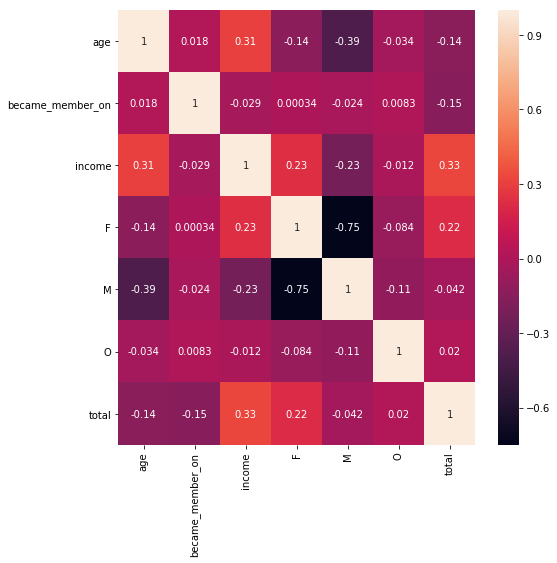

In [39]:
Var_Corr_person_income = profile.drop(['id'],axis=1).corr()
# plot the heatmap and annotation on it
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(Var_Corr_person_income, xticklabels=Var_Corr_person_income.columns, yticklabels=Var_Corr_person_income.columns, annot=True,ax=ax)

total_amount_spent seems to have a positive correlation with income and females and a negative correlation with age 
so it seems that younger females with hgiher income will spend more money on starbucks

In [40]:

profile.dropna(inplace=True)
X_total=profile.drop(['total','id'],axis=1)
y_total=profile['total']

x_train_total,x_test_total,y_train_total,y_test_total=train_test_split(X_total,y_total,test_size=.20,random_state=42)

In [41]:
pipeline = Pipeline(
        [
            ("clf",KNeighborsRegressor())
        ]
    )
parameters = {'clf__n_neighbors': [5, 10,15],
             'clf__n_jobs':[-1],
              'clf__weights':['distance','uniform']
             }
cv_total = GridSearchCV(pipeline, param_grid=parameters,n_jobs=-1)

In [42]:
cv_total.fit(x_train_total,y_train_total)



GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__n_neighbors': [5, 10, 15], 'clf__n_jobs': [-1], 'clf__weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
#We will fit the other model here as well and then evaluate the results in the next section
df.head()

,person,time,offer_id,offer completed,offer received,offer viewed,age,became_member_on,id_x,income,...,duration,id_y,reward,email,web,mobile,social,bogo,discount,informational
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,1,68,20180426,e2127556f4f64592b11af22de27a7932,70000.0,...,7,2906b810c7d4411798c6938adc9daaa5,2,1,1,1,0,0,1,0
5,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,0,2,2,65,20180209,389bc3fa690240e798340f5a15918d5c,53000.0,...,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,1,1,1,58,20171111,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,...,4,3f207df678b143eea3cee63160fa8bed,0,1,1,1,0,0,0,1
8,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,61,20170911,aa4862eba776480b8bb9c68455b8c2e1,57000.0,...,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,1,0,0,0,1,0
9,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,62,20160211,31dda685af34476cad5bc968bdb01c53,71000.0,...,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,1,0,0,0,1,0


In [44]:
X=df.drop(['person','time','offer_id','id_x','id_y','offer completed'],axis=1)
y=df['offer completed']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

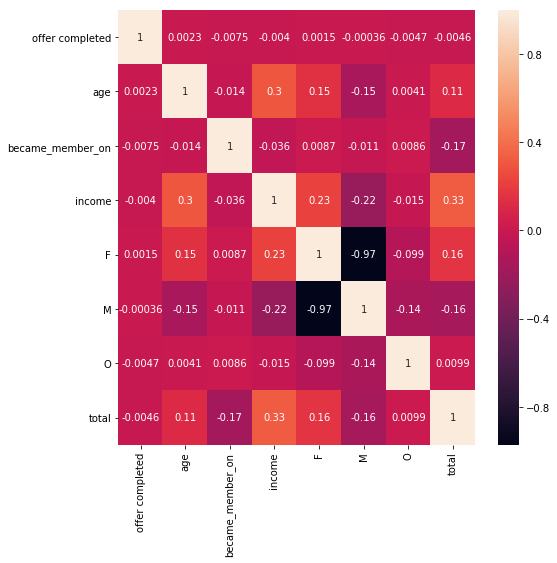

In [45]:
#checking which features of a person most affect the offer being completed 
Var_Corr_person_offer = df[['offer completed','age','became_member_on','income','F', 'M',
       'O', 'total']].corr()
# plot the heatmap and annotation on it
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(Var_Corr_person_offer, xticklabels=Var_Corr_person_offer.columns, yticklabels=Var_Corr_person_offer.columns, annot=True,ax=ax)

From the above not many deductions could be made buy it does't look like a strong correlation with any of these users features 

In [46]:
df['email'].unique()

array([1])

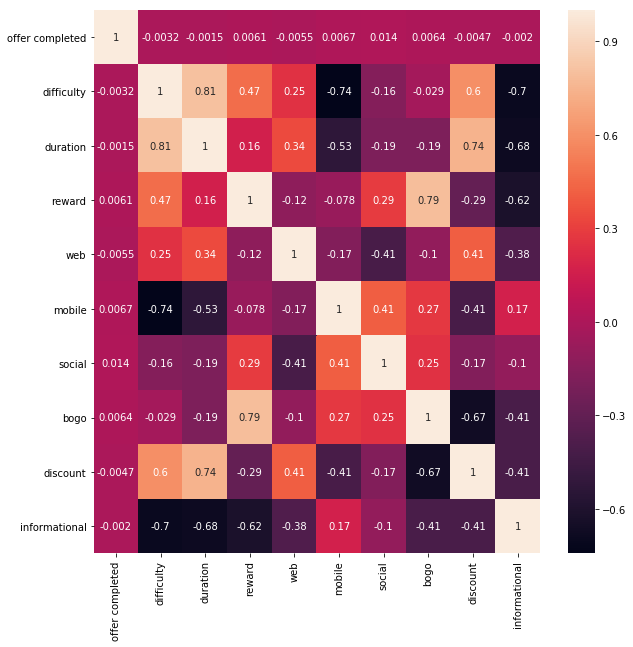

In [47]:
#emails value is always one so will remove it from here and from the model
Var_Corr_offer = df[['offer completed','difficulty', 'duration', 'reward',
       'web', 'mobile', 'social', 'bogo', 'discount', 'informational']].corr()
# plot the heatmap and annotation on it
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Var_Corr_offer, xticklabels=Var_Corr_offer.columns, yticklabels=Var_Corr_offer.columns, annot=True,ax=ax)

The correlation between the offer being completed and other offer features are also not particulary strong the strongest one seems to be if the offer channel is social media with correlation =0.014

In [48]:
pipeline_knn = Pipeline(
        [
            ('scaler', StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]
    )
parameters = {'clf__n_neighbors': [5, 10,15],
             'clf__n_jobs':[-1],
              'clf__weights':['distance','uniform']
             }
cv_knn = GridSearchCV(pipeline_knn, param_grid=parameters,n_jobs=-1)

In [49]:
cv_knn.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__n_neighbors': [5, 10, 15], 'clf__n_jobs': [-1], 'clf__weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
y_pred_knn=cv_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.50      0.66      0.57      4237
          1       0.46      0.30      0.37      3498
          2       0.38      0.31      0.35       602
          3       0.34      0.28      0.31        43
          4       0.00      0.00      0.00         4

avg / total       0.48      0.49      0.47      8384



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
#
pipeline_RF = Pipeline(
        [
            
            ("clf", RandomForestClassifier())
        ]
    )
parameters = {'clf__n_estimators': [5, 10,15],
             'clf__n_jobs':[-1],
              'clf__max_depth':[None,10]
             }
cv_RF = GridSearchCV(pipeline_RF, param_grid=parameters,n_jobs=-1)


cv_RF.fit(x_train, y_train)
y_pred_RF=cv_RF.predict(x_test)
print(classification_report(y_test, y_pred_RF))

             precision    recall  f1-score   support

          0       0.51      0.78      0.62      4237
          1       0.48      0.20      0.28      3498
          2       0.36      0.24      0.29       602
          3       0.10      0.05      0.06        43
          4       0.25      0.25      0.25         4

avg / total       0.48      0.50      0.45      8384



In [56]:
#since the scores are not very good I will try to normalize and use a gradient boosting classifier 
clf_gb = GradientBoostingClassifier()

scaler = StandardScaler()

x_train=scaler.fit_transform(x_train)

x_test=scaler.fit_transform(x_test)

clf_gb.fit(x_train, y_train)
y_pred_gb=clf_gb.predict(x_test)
print(classification_report(y_test, y_pred_gb))

             precision    recall  f1-score   support

          0       0.51      0.84      0.63      4237
          1       0.51      0.15      0.24      3498
          2       0.39      0.23      0.29       602
          3       0.30      0.26      0.28        43
          4       0.25      0.25      0.25         4

avg / total       0.50      0.50      0.44      8384



## Results

### Model Evaluation and validation

In [ ]:
## Evaluating the total amount spent model 
y_pred_total=cv_total.predict(x_test_total)
r2_score(y_test_total, y_pred_total)


In [67]:
## Evaluting the first ML


print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.50      0.67      0.58      4237
          1       0.42      0.33      0.37      3498
          2       0.00      0.00      0.00       602
          3       0.00      0.00      0.00        43
          4       0.00      0.00      0.00         4

avg / total       0.43      0.48      0.44      8384



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Justfication
The R squared value of the first model is equal to 0.156 which means that the predicated amount and the actaul amount were merely a bit similar but it still can't very accuartely predict the total 

Here you can see the classification f1 score=0.44,precison=0.43 and recall=0.48 for the classification model which is not very good as well because it means it classifies correclty only 44% of the time 



## Conclusion

### Reflection
Here we were attempting to create a ML model to accuartely predict if a user would respond to an offer given his info and the offer info that would help us create personalized offers that we know that users would use and help us understand which users prefer which offers
What was particulary challenging was to pre process the data to set it up to feed it to the  models as we created a dataframe of every unique user offer combination,the details of the user and the offer.we could set this up as a function and use that as soon as we have more data, we also found some abnormalities in the age distbution that might be something to check for the future,The customer gender seems to be almost equally even between male and female with just a few classified as others.
I used a KNN models   and preformed a gridsearch  to optimizte hyperparameters 
The Model preformance is a bit disappointing to be honest if anyone has any ideas about how to improve I would love to hear from you 

### Improvements
 Two things I would do to try to improve this either get more data see if that improves the model preformance or capture more features get for example a customer statisfaction rating get customers to fill out a survey of how often do they go to starbucks, get other info about the users like where they live how near is starbucks to them ,etc... . Another thing we could do is a wider grid search with more parameters but that model would require quite some time to go through everything


